In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
from scipy.ndimage.filters import gaussian_filter
from tqdm import tqdm
def initialize_phi(image_shape, type='checkerboard'):
    if type == 'checkerboard':
        phi = np.array([[(-1)**(i+j) for j in range(image_shape[1])] for i in range(image_shape[0])])
    elif type == 'circle':
        center = (image_shape[0] // 2, image_shape[1] // 2)
        radius = min(center)
        phi = np.array([[radius - np.sqrt((i-center[0])**2 + (j-center[1])**2) for j in range(image_shape[1])] for i in range(image_shape[0])])
    return phi

def reinitialize_phi(phi, iterations=10):
    binary_mask = (phi <= 0).astype(np.int32)
    positive_distance = distance_transform_edt(binary_mask)
    negative_distance = distance_transform_edt(1 - binary_mask)
    signed_distance = positive_distance - negative_distance
    for _ in range(iterations):
        signed_distance = gaussian_filter(signed_distance, sigma=1)
    return signed_distance

def chan_vese_evolution(image, phi, lambda1, lambda2, mu, nu, dt, num_iterations):
    for _ in tqdm(range(num_iterations)):
        c1 = np.mean(image[phi <= 0])
        c2 = np.mean(image[phi > 0])
        force = mu * (4*image - 2*c1 - 2*c2) - nu
        phi = phi + dt * force
        if _ % 50 == 0:
            phi = reinitialize_phi(phi)
    return phi

def extract_segmentation(phi):
    return np.where(phi <= 0, 1, 0)



/var/folders/sv/5jxpd34x6hdd46kv5pfxqdh80000gn/T/ipykernel_13792/1925869796.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


100%|██████████| 100/100 [01:10<00:00,  1.43it/s]


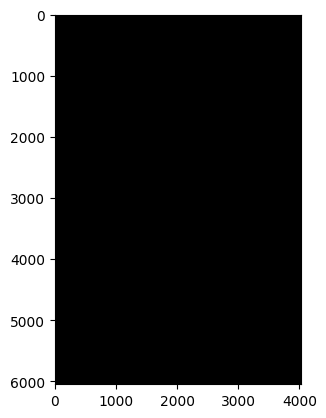

In [3]:
# Load your image here
image = plt.imread("./image.jpeg")[:,:,0]  # Assuming a grayscale image or converting it to grayscale

phi = initialize_phi(image.shape, type='checkerboard')
phi = chan_vese_evolution(image, phi, lambda1=1, lambda2=1, mu=0.5, nu=0, dt=0.1, num_iterations=100)
segmentation = extract_segmentation(phi)

# Display the segmentation
plt.imshow(segmentation, cmap='gray')
plt.show()
